In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [2]:
datadir = join('..', 'hybridmodels', 'data', 'feature_stats', 'dataframes')
gdf = gpd.read_parquet(join(datadir, 'gombe_mossuril_4.parquet'))

### Example region

## Hunter (2005) analytical solution

In [20]:
x = np.arange(0, 5000, 1)

h = solve_hunter_eq(h0=1, n=.03, u=1, x=x, t=3600)

/var/folders/7w/k72v6f5x25gblsqmh6bxd3j40000gn/T/ipykernel_6827/1084357436.py:5: RuntimeWarning: invalid value encountered in power
  return (3/7)*(C**(7/3))


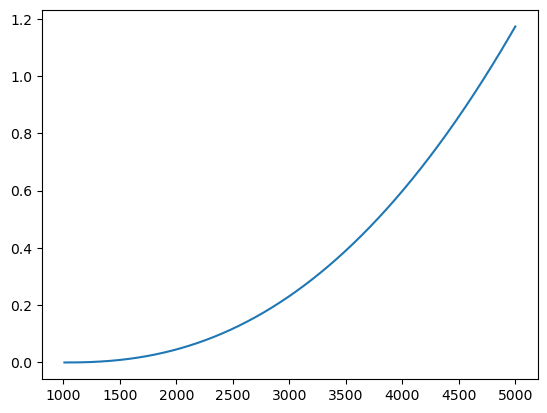

In [21]:
plt.plot(x, h)

AttributeError: 'Axes' object has no attribute 'plot_surface'

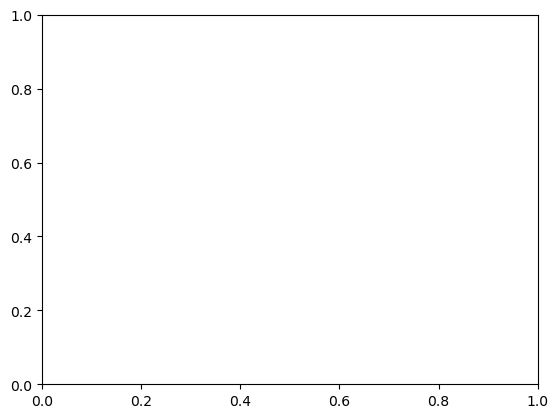

In [19]:
import numpy as np

def solve_hunter_eq(h0, n, u, x, t):
    C = (h0**(3/7)) + (3/7)*n**2*u**3*(x-u*t)
    return (3/7)*(C**(7/3))

# Example usage
h0 = 5
n = 0.05
u = 0.1
x = np.arange(0, 5000, 1)
t = np.arange(0, 3600, 1)
x, t = np.meshgrid(x, t)
h = solve_hunter_eq(h0, n, u, x, t)

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca()
surf = ax.plot_surface(x, t, h, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('h')
plt.show()


In [15]:
def f_hunter(x, t, u=1, n=.03, h0=1.):
    
    C = (3 / 7) * h0**(7 / 3) 
    
    one = (7 / 3) * (C - (x**2) * (u**3) * (x - u * t))
    print(one)
    two = one**(3 / 7)
    
    return two

x = np.arange(0, 5000, 1)

In [16]:
for ix in x:
    f_hunter(ix, 3600)

1.0
8398.666666666668
33582.333333333336
75538.0
134251.6666666667
209709.33333333334
301897.0
410800.6666666667
536406.3333333334
678700.0000000001
837667.6666666667
1013295.3333333334
1205569.0
1414474.6666666667
1639998.3333333333
1882126.0
2140843.6666666665
2416137.3333333335
2707993.0000000005
3016396.666666667
3341334.3333333335
3682792.0000000005
4040755.666666667
4415211.333333334
4806145.0
5213542.666666667
5637390.333333334
6077674.000000001
6534379.666666667
7007493.333333334
7497001.000000001
8002888.666666667
8525142.333333334
9063748.0
9618691.666666668
10189959.333333334
10777537.0
11381410.666666666
12001566.333333334
12637990.0
13290667.666666666
13959585.333333334
14644729.0
15346084.666666666
16063638.333333334
16797376.0
17547283.666666668
18313347.333333332
19095553.0
19893886.666666668
20708334.333333336
21538882.000000004
22385515.666666668
23248221.333333336
24126985.000000004
25021792.666666668
25932630.333333336
26859484.000000004
27802339.666666668
28761183.

/var/folders/7w/k72v6f5x25gblsqmh6bxd3j40000gn/T/ipykernel_6827/128281553.py:7: RuntimeWarning: invalid value encountered in double_scalars
  two = one**(3 / 7)


/var/folders/7w/k72v6f5x25gblsqmh6bxd3j40000gn/T/ipykernel_6827/2339478515.py:5: RuntimeWarning: invalid value encountered in power
  two = one**(3 / 7)


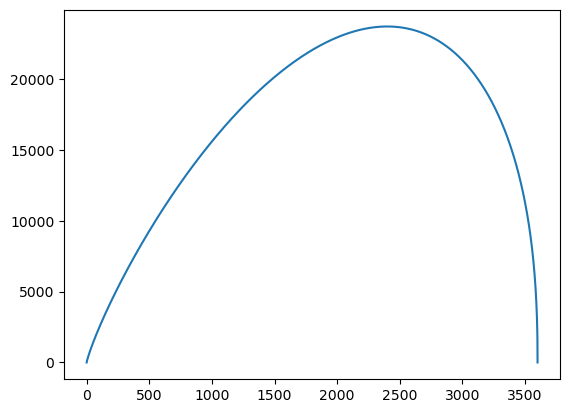

In [9]:


plt.plot(x, f_hunter(x, 3600))

In [14]:
x

array([   0,    1,    2, ..., 4997, 4998, 4999])

# SFINCS
## Leijnse (2021)
### Example: 4.1. Compound flooding during Hurricane Irma
"The large-scale model has a 0.1-degree grid resolution and is forced by tides, background meteorological conditions and wind and pressure fields due to Hurricane Irma."

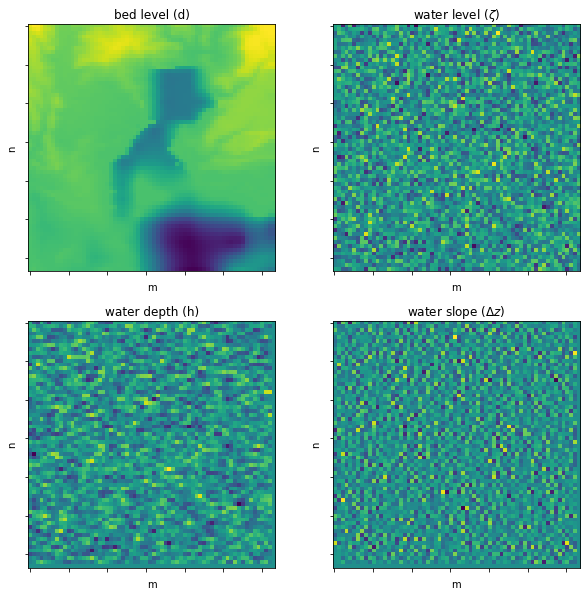

In [151]:
gridsize = 64

d = np.array(gdf.elevation).reshape((gridsize, gridsize))
zeta = np.random.normal(0, 0.01, (gridsize, gridsize))
h = np.zeros((gridsize, gridsize))
z = np.zeros((gridsize, gridsize))

# assign values to staggered grid
for n in range(gridsize - 1):
    for m in range(gridsize - 1):
        h[n, m] = 0.5 * (zeta[n, m + 1] +  zeta[n, m])
        z[n, m] = zeta[n, m + 1] - zeta[n, m]
        
        
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

vmin = zeta.min()
vmax = zeta.max()

axs[0, 0].imshow(d)
axs[0, 1].imshow(zeta)
axs[1, 0].imshow(h)
axs[1, 1].imshow(z)

axs[0, 0].set_title('bed level (d)')
axs[0, 1].set_title(r'water level ($\zeta$)')
axs[1, 0].set_title('water depth (h)')
axs[1, 1].set_title(r'water slope ($\Delta z$)')
    
for ax in axs:
    for ax in ax:
        ax.set_xlabel('m')
        ax.set_ylabel('n')

        ax.set_xticklabels([])
        ax.set_yticklabels([])

In [153]:
# parameters and initial conditions
alpha = 0.75  # default
dx = 500  # meters
g = 9.8  # gravity
u = (gdf.wind_avg.mean(), gdf.wind_avg.mean())  # uniform wind speed in (x, y) directions
rho_air = 1.2754 # air density kg / m³

7.124380267195952

In [111]:


# define grid
d = np.array([np.arange(0, gridsize, 1)] * gridsize).T     # bed level
zeta = np.random.normal(2, 1, (gridsize, gridsize))  # water level

# make staggered grid
h = np.zeros((gridsize, gridsize))
z = np.zeros((gridsize, gridsize))
for n in range(gridsize - 1):
    for m in range(gridsize - 1):
        h[n, m] = 0.5 * (zeta[n, m + 1] +  zeta[n, m])
        z[n, m] = zeta[n, m + 1] - zeta[n, m]
        
# define time step using CFL-condition
hmax = h.max()
dt = alpha * dx / np.sqrt(g * hmax)

# charnock relation for wind drag coefficient (correct later)
Cd = 0.025 * np.sqrt(tau / rho_air)

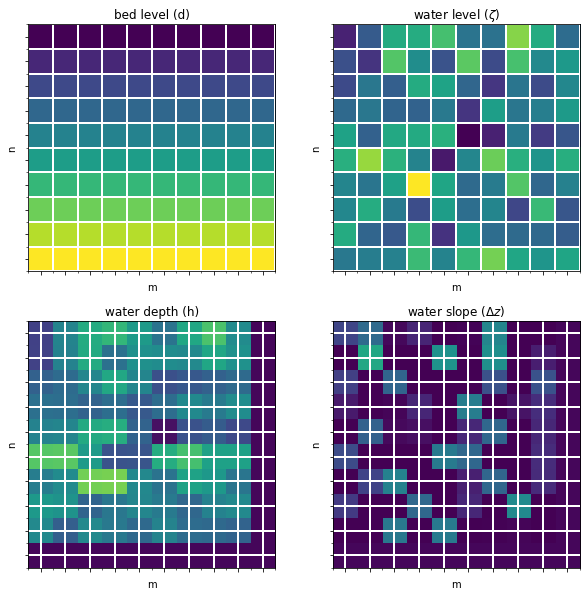

In [119]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

vmin = zeta.min()
vmax = zeta.max()

axs[0, 0].imshow(d)
axs[0, 1].imshow(zeta, vmin=vmin, vmax=vmax)
axs[1, 0].imshow(h, vmin=vmin, vmax=vmax)
axs[1, 1].imshow(z, vmin=vmin, vmax=vmax)

axs[0, 0].set_title('bed level (d)')
axs[0, 1].set_title(r'water level ($\zeta$)')
axs[1, 0].set_title('water depth (h)')
axs[1, 1].set_title(r'water slope ($\Delta z$)')

for ax in axs[0]:
    # major ticks
    ax.set_xticks(np.arange(0, gridsize, 1))
    ax.set_yticks(np.arange(0, gridsize, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, gridsize + 1, 1))
    ax.set_yticklabels(np.arange(1, gridsize + 1, 1))

    # Minor ticks
    ax.set_xticks(np.arange(-.5, gridsize, 1), minor=True)
    ax.set_yticks(np.arange(-.5, gridsize, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
    

for ax in axs[1]:
    # Major ticks
    ax.set_xticks(np.arange(0, gridsize, 1))
    ax.set_yticks(np.arange(0, gridsize, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, gridsize + 1, 1))
    ax.set_yticklabels(np.arange(1, gridsize + 1, 1))

    # Minor ticks
    ax.set_xticks(np.arange(-.5, gridsize, 1), minor=True)
    ax.set_yticks(np.arange(-.5, gridsize, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='major', color='white', linestyle='-', linewidth=2)
    
    
for ax in axs:
    for ax in ax:
        ax.set_xlabel('m')
        ax.set_ylabel('n')

        ax.set_xticklabels([])
        ax.set_yticklabels([])

In [2]:
# SFINCS-LIE (no advection)
def next_q(q: float, q_prev: tuple, h: float, zeta: tuple, tau: float, n: int, dx: float, dt: float, theta=0.9):
    g = 9.8
    
    q_smooth = theta * q + 0.5 * (1 - theta) * (q_prev[1] + q_prev[0])
    momentum = g * h * (zeta[1] - zeta[0]) / dx - tau / rho
    nominator = q_smooth - momentum * dt
    denominator = 1 + g * dt * n**2 / h**(7/3)
    
    return nominator / denominator